## Decorrelating your data and dimension reduction

Dimension reduction summarizes a dataset using its common occuring patterns. In this chapter, you'll learn about the most fundamental of dimension reduction techniques, "Principal Component Analysis" ("PCA"). PCA is often used before supervised learning to improve model performance and generalization. It can also be useful for unsupervised learning. For example, you'll employ a variant of PCA will allow you to cluster Wikipedia articles by their content!

## Visualizing the PCA transformation
### Dimension reduction
- More efficient storage and computation
- Remove less-informative "noise" features which cause problems for prediction tasks, e.g.
classification, regression

### Principal Component Analysis(PCA)
- Fundamental dimension reduction technique
- First step "decorrelation", Second step reduces dimension 
- Rotates data samples to be aligned with axes
- Shifts data samples so they have mean 0. No information is lost

In [22]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix

In [29]:
#load grain dataset
grains = np.genfromtxt('./datasets/grains/seeds-width-vs-length.csv', delimiter=',')
grains[:5]

array([[3.312, 5.763],
       [3.333, 5.554],
       [3.337, 5.291],
       [3.379, 5.324],
       [3.562, 5.658]])

### Correlated data in nature
Make a scatter plot of width vs length and measure their Pearson correlation.

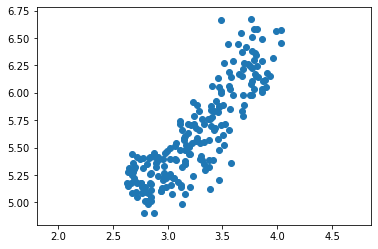

0.8604149377143469


In [7]:
# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

### Decorrelating the grain measurements with PCA
Use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

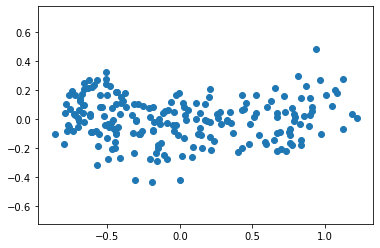

7.676151381197371e-17


In [9]:
# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

### The first principal component
The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

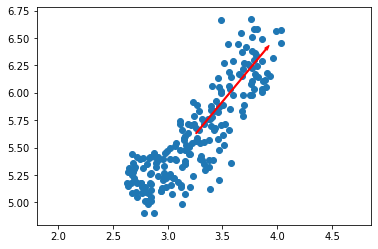

In [10]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

## Intrinsic dimension
- Intrinsic dimension = number of features needed to
approximate the dataset
- Essential idea behind dimension reduction
- What is the most compact representation of the samples?
- Can be detected with PCA

### Variance of the PCA features
The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

In [30]:
#load dataset
fish = pd.read_csv('./datasets/fish.csv', header=None)
fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [12]:
#create arrays
samples = fish.loc[:,1:6].values

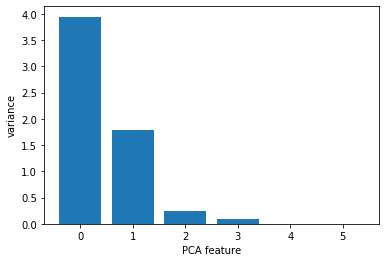

In [14]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


### Dimension reduction of the fish measurements
Use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

In [26]:
#standardize data
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)

In [27]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)


(85, 2)


### A tf-idf word-frequency array
Create a tf-idf word frequency array for a toy collection of documents. For this, use the _TfidfVectorizer_ from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.



In [18]:
documents =['cats say meow', 'dogs say woof', 'dogs chase cats']
# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


### Clustering Wikipedia part I
Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

In [32]:
df = pd.read_csv('./datasets/wikipedia_articles/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [24]:
# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

In [25]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values(by='label'))


    label                                        article
18      0  2010 United Nations Climate Change Conference
19      0  2007 United Nations Climate Change Conference
17      0  Greenhouse gas emissions by the United States
16      0                                        350.org
15      0                                 Kyoto Protocol
14      0                                 Climate change
13      0                               Connie Hedegaard
12      0                                   Nigel Lawson
11      0       Nationally Appropriate Mitigation Action
10      0                                 Global warming
0       1                                       HTTP 404
8       1                                        Firefox
9       1                                       LinkedIn
2       1                              Internet Explorer
3       1                                    HTTP cookie
1       1                                 Alexa Internet
5       1                      